# Stock Prices Prediction - Team 20

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import math
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta

from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
import os
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import LSTM , GRU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model

K.clear_session()
# matplotlib.rcParams['axes.labelsize'] = 14
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['text.color'] = 'k'


Using TensorFlow backend.


## Extracting Data 

In [2]:
homeDir="/Users/namrataruchandani/Downloads/data_set/stocks/"
for dirname, _, filenames in os.walk('/Users/namrataruchandani/Downloads/data_set/stocks'):
    myArr =[]    
    for filename in filenames: 
        myArr.append(filename)


### Choose the company for stock price prediction from below

In [3]:
print(myArr)

['RIV.csv', 'ANTE.csv', 'CSCO.csv', 'PRI.csv', 'NZF.csv', 'HLNE.csv', 'UNT.csv', 'HUBS.csv', 'GPL.csv', 'SBGI.csv', 'UFCS.csv', 'TEAF.csv', 'RJZ.csv', 'GFED.csv', 'AIRT.csv', 'SITC.csv', 'NXN.csv', 'BNY.csv', 'RHE.csv', 'ISSC.csv', 'KNDI.csv', 'EFT.csv', 'TRNS.csv', 'CARO.csv', 'NTZ.csv', 'AEIS.csv', 'UAL.csv', 'TROW.csv', 'ISRG.csv', 'EGP.csv', 'EFC.csv', 'EEX.csv', 'NVR.csv', 'PLYM.csv', 'TELA.csv', 'FEIM.csv', 'WOR.csv', 'TLRY.csv', 'PRGO.csv', 'LECO.csv', 'ALTG.csv', 'RPT.csv', 'VCYT.csv', 'USAC.csv', 'COHN.csv', 'NBW.csv', 'PLOW.csv', 'PIC.csv', 'PRGX.csv', 'ERF.csv', 'IFN.csv', 'FIHD.csv', 'PHG.csv', 'UVE.csv', 'BUD.csv', 'ORRF.csv', 'NTRSO.csv', 'PFL.csv', 'PDS.csv', 'OESX.csv', 'BLDP.csv', 'SIBN.csv', 'NOG.csv', 'BXC.csv', 'CHAP.csv', 'CHNGU.csv', 'KSM.csv', 'XCUR.csv', 'PDD.csv', 'CHCO.csv', 'BBIO.csv', 'LBTYK.csv', 'IMAB.csv', 'SPOK.csv', 'SPLP.csv', 'TPR.csv', 'TSI.csv', 'DVN.csv', 'SACC.csv', 'MGEE.csv', 'MNCLU.csv', 'AMSC.csv', 'SVT.csv', 'STK.csv', 'XLRN.csv', 'SWP.csv', 

In [4]:
name=input()
df = pd.read_csv(homeDir + name + '.csv',na_values=['null'])
# df = df.sort_values('Date')
print(df.head())
df.tail()
df_lr=df.copy()


RL
         Date    Open    High     Low   Close  Adj Close    Volume
0  1997-06-12  32.125  33.000  30.875  31.500  26.125538  19963800
1  1997-06-13  31.750  32.875  31.750  32.375  26.851255   3661100
2  1997-06-16  32.250  32.500  30.625  30.875  25.607174   2481700
3  1997-06-17  30.125  30.250  29.125  29.750  24.674129   2283800
4  1997-06-18  29.750  29.750  28.125  28.375  23.533720   1749900


In [5]:
df_arima=df.copy()
df_arima = df_arima.groupby('Date')['Close'].sum().reset_index()
df_arima.head()

,Date,Close
0,1997-06-12,31.500
1,1997-06-13,32.375
2,1997-06-16,30.875
3,1997-06-17,29.750
4,1997-06-18,28.375


In [6]:
df.set_index('Date', inplace=True)

In [7]:
print(df.head())
print()
print(df.info())
print()
print(df.shape)

              Open    High     Low   Close  Adj Close    Volume
Date                                                           
1997-06-12  32.125  33.000  30.875  31.500  26.125538  19963800
1997-06-13  31.750  32.875  31.750  32.375  26.851255   3661100
1997-06-16  32.250  32.500  30.625  30.875  25.607174   2481700
1997-06-17  30.125  30.250  29.125  29.750  24.674129   2283800
1997-06-18  29.750  29.750  28.125  28.375  23.533720   1749900

<class 'pandas.core.frame.DataFrame'>
Index: 5739 entries, 1997-06-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5739 non-null   float64
 1   High       5739 non-null   float64
 2   Low        5739 non-null   float64
 3   Close      5739 non-null   float64
 4   Adj Close  5739 non-null   float64
 5   Volume     5739 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 313.9+ KB
None

(5739, 6)


In [8]:
 df=df.dropna()

In [9]:
df.isnull().values.any()


False

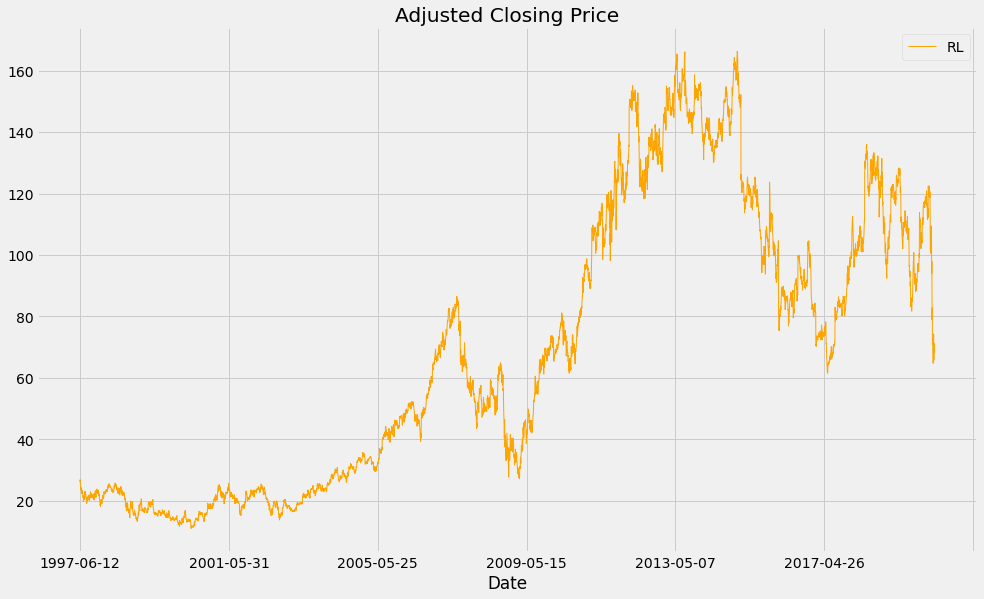

In [10]:
df['Adj Close'].plot(label=name, figsize=(15, 9), title='Adjusted Closing Price', color='orange', linewidth=1.0, grid=True)
plt.legend()


## Correlation with Adjusted Close

In [11]:
X=df.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

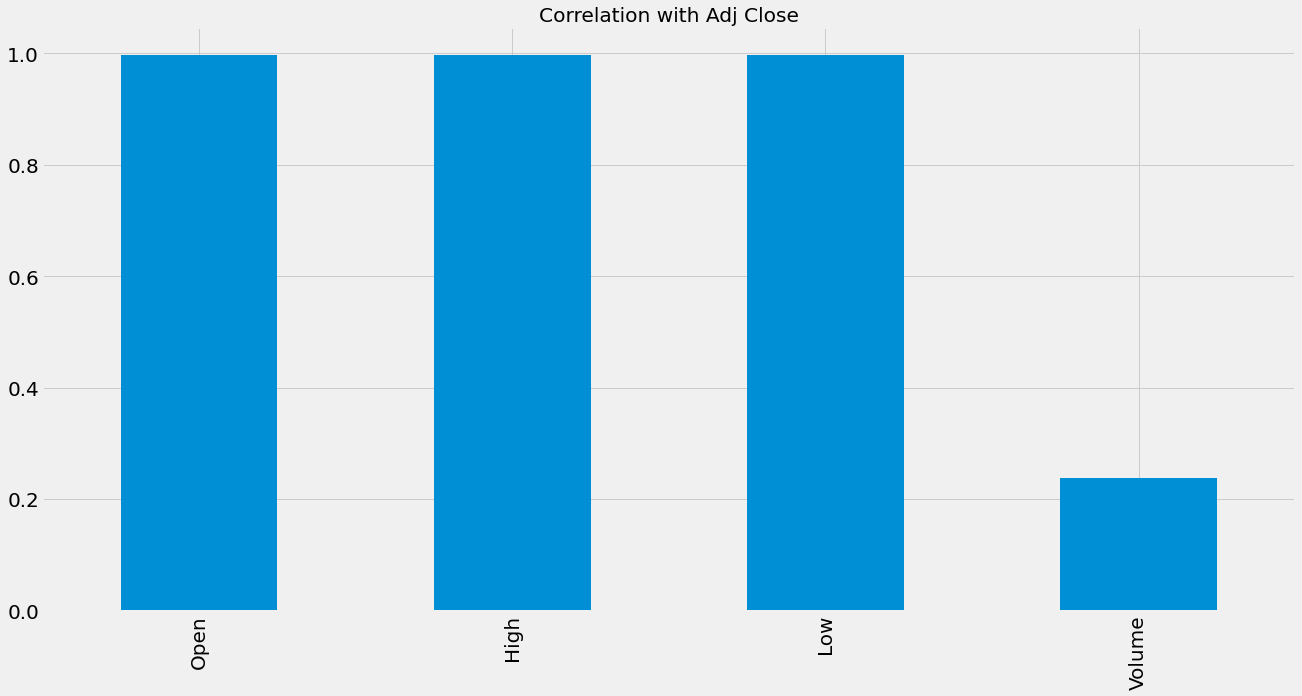

In [12]:
X.corrwith(df['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

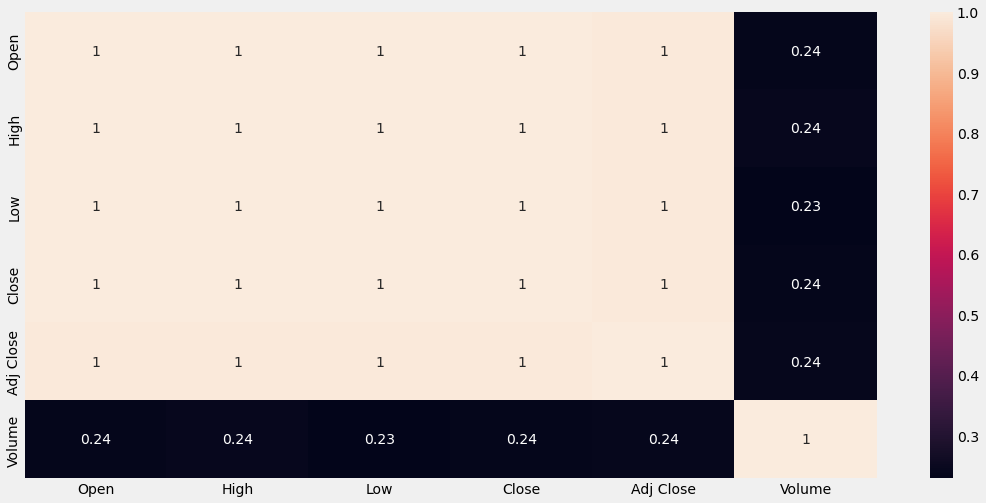

In [14]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

### Return Deviation for determining risk and return

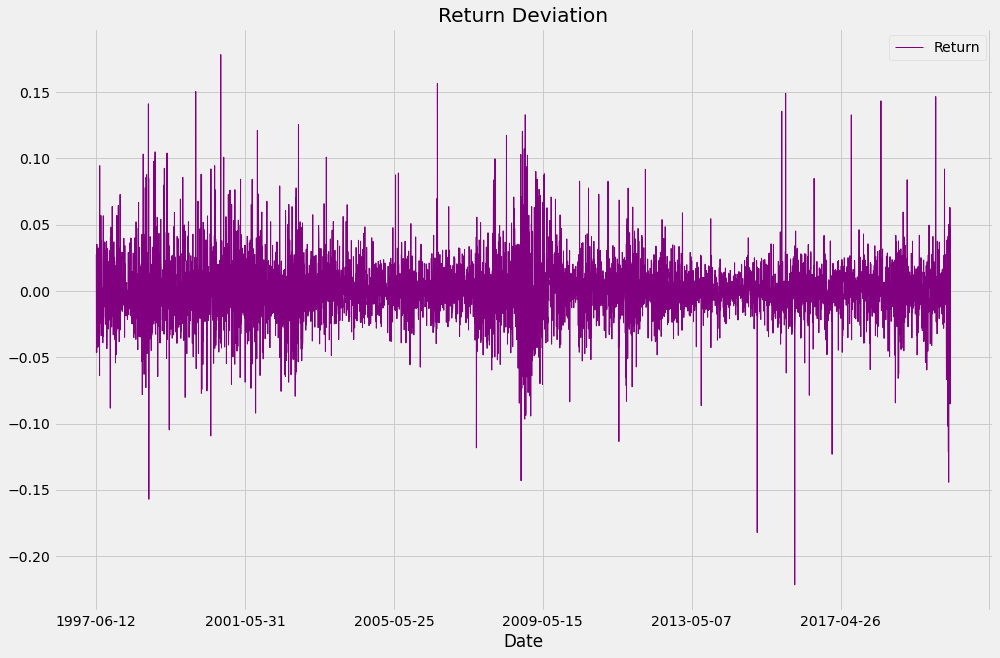

In [16]:
CloseColumn = df['Adj Close']
ReturnDeviation = CloseColumn / CloseColumn.shift(1) - 1
ReturnDeviation.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='purple', linewidth=1.0, grid=True)
plt.legend()

# 1. Linear Regression

## Data Preprocessing 

In [35]:
# predict the stock prices for a certain number of days.
PredictDays = 40
df_lr=df.copy()

In [36]:

df_lr['Prediction'] =df_lr['Adj Close'].shift(-PredictDays)
print(df_lr['Prediction'])
print(df_lr['Adj Close'])


Date
1997-06-12    20.941902
1997-06-13    20.527216
1997-06-16    20.164356
1997-06-17    20.216198
1997-06-18    19.905176
                ...    
2020-03-26          NaN
2020-03-27          NaN
2020-03-30          NaN
2020-03-31          NaN
2020-04-01          NaN
Name: Prediction, Length: 5739, dtype: float64
Date
1997-06-12    26.125538
1997-06-13    26.851255
1997-06-16    25.607174
1997-06-17    24.674129
1997-06-18    23.533720
                ...    
2020-03-26    74.320000
2020-03-27    67.989998
2020-03-30    71.260002
2020-03-31    66.830002
2020-04-01    65.690002
Name: Adj Close, Length: 5739, dtype: float64


In [37]:
X = np.array(df_lr.drop(['Prediction'], axis = 1))
X = X[:-PredictDays]     
print(X.shape)

y = np.array(df_lr['Prediction'])
y = y[:-PredictDays]      
print(y.shape)


(5699, 6)
(5699,)


### Splitting the data into 80% for training & 20% for testing

In [38]:
# Splitting the data into 80% for training & 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)     
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4559, 6)
(4559,)
(1140, 6)
(1140,)


##  Linear Regression Modelling 

In [39]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)   

LinearRegression()

In [40]:
TLMS = LinearModel.score(X_train, y_train)
print('Train Linear Model score:', TLMS)

Train Linear Model score: 0.9563216350123482


In [41]:
LMS = LinearModel.score(X_test, y_test)
print('Test Linear Model score:', LMS)

Test Linear Model score: 0.9545040331850384


In [42]:
X_predict = np.array(df_lr.drop(['Prediction'], 1))[-PredictDays:]

LinearModel_prediction = LinearModel.predict(X_predict)
LinearModel_realprediction = LinearModel.predict(np.array(df.drop(['Prediction'], 1)))


In [43]:
Predicted_Dates = []
RecentDate = df_lr.index.max()
display_at = 800
alpha = 0.25

for i in range(PredictDays):
    RecentDate += str(timedelta(days=1))
    Predicted_Dates.append(RecentDate)


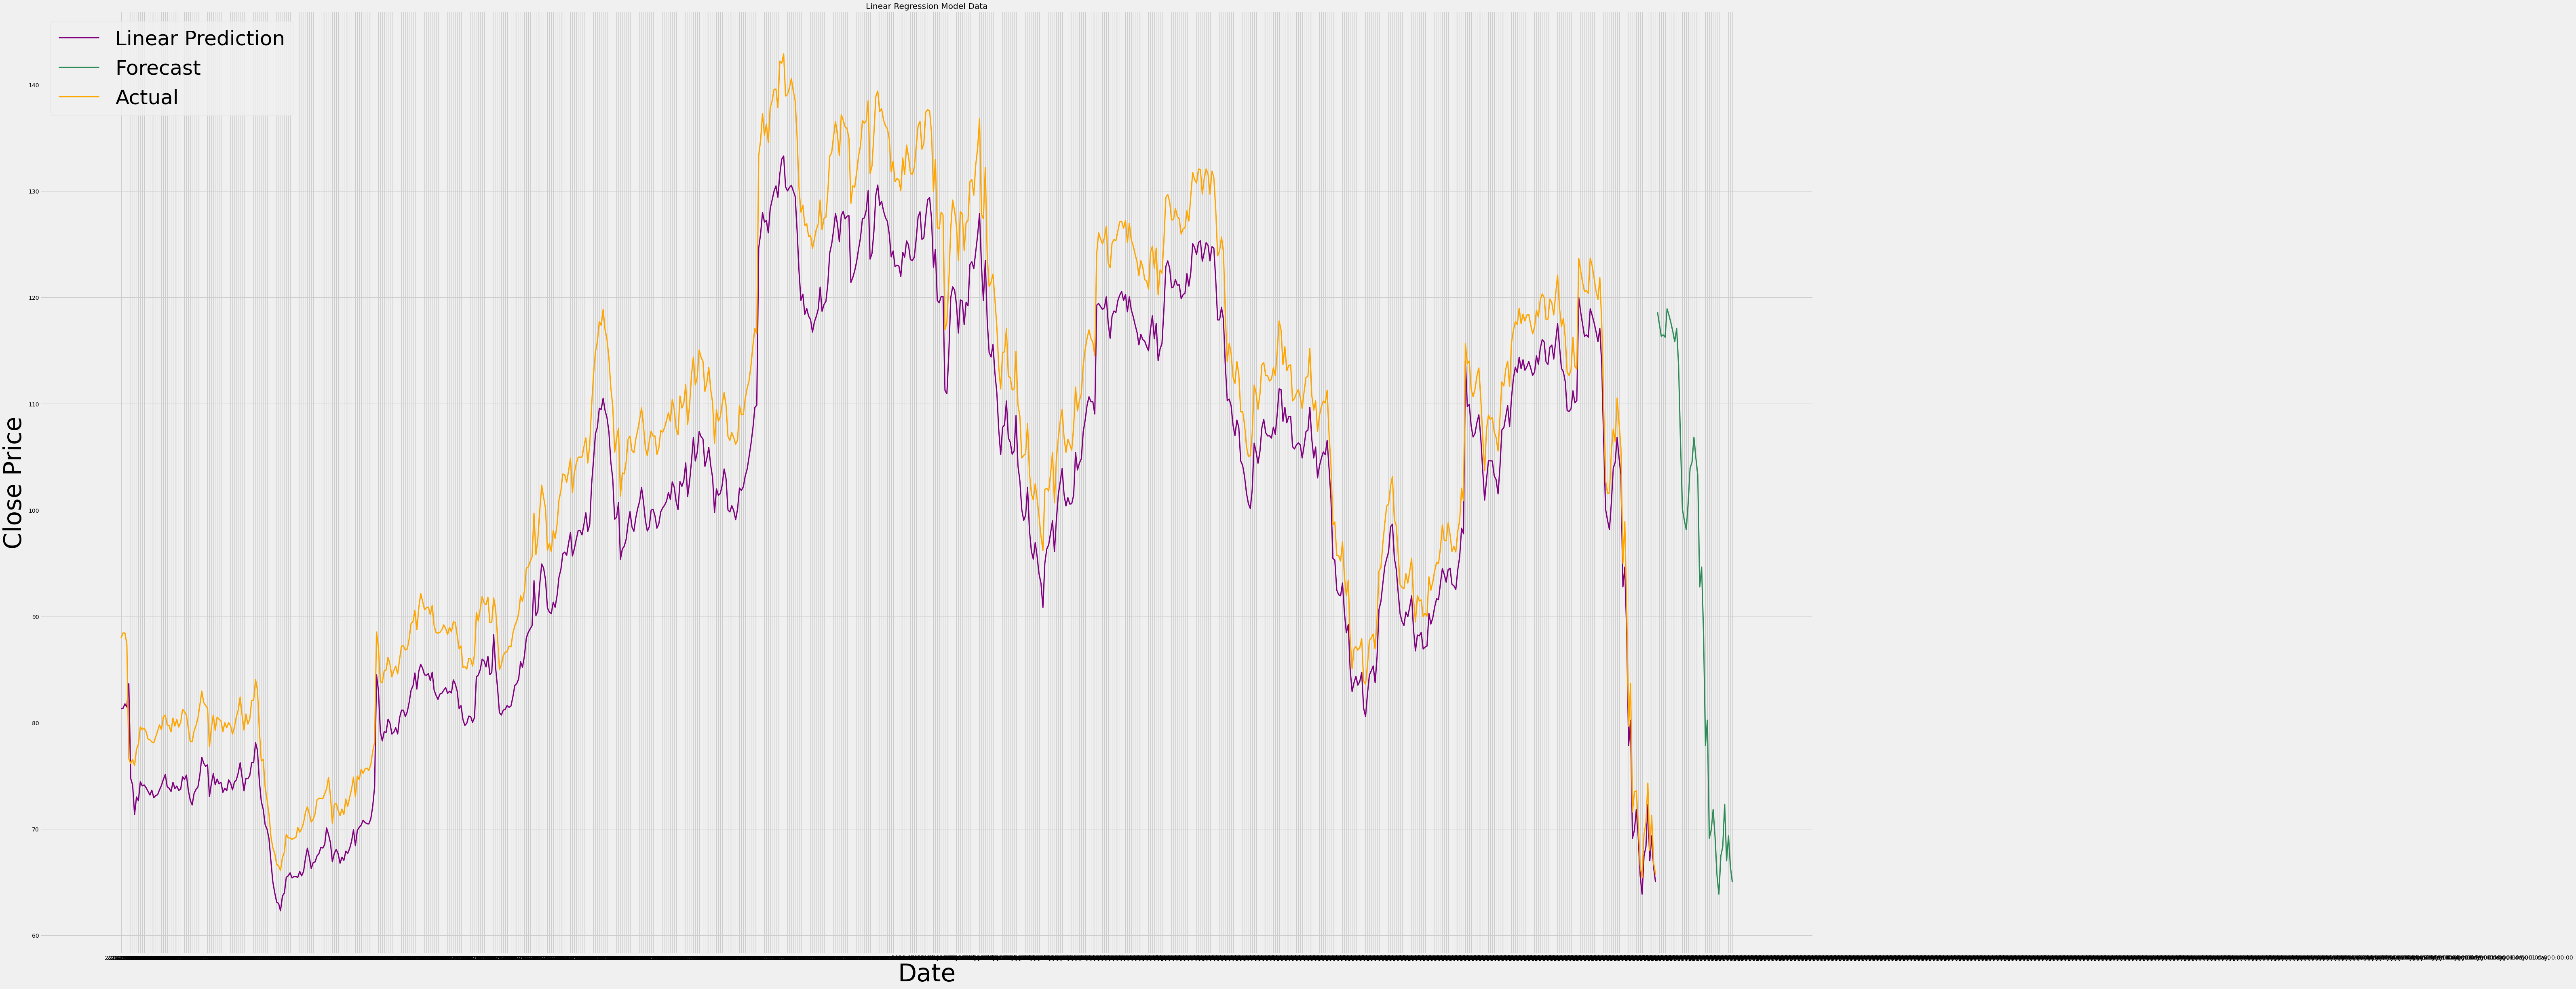

In [44]:
plt.figure(figsize=(70,40))
plt.title('Linear Regression Model Data')
plt.xlabel('Date', fontsize=60)
plt.ylabel('Close Price', fontsize=60)

plt.plot(df_lr.index[-display_at:], LinearModel_realprediction[-display_at:], label='Linear Prediction',linewidth = 3, color='purple')

plt.plot(Predicted_Dates, LinearModel_prediction, label='Forecast',linewidth = 3, color='seagreen')

plt.plot(df_lr.index[-display_at:], df_lr['Close'][-display_at:], label='Actual',linewidth = 3, color='orange')

plt.legend(loc ="upper left", fontsize=50)
plt.show()

In [45]:
mse = mean_squared_error(LinearModel_realprediction,df_lr['Close'])

rmse = math.sqrt(mse)

print(rmse)

10.900993828974197


# 2. Auto Regressive Integrated Moving Average (ARIMA)

## Data preprocessing

In [33]:
from scipy import stats
df_arima1=df.copy()
df_arima=df.copy()

# df_arima[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# df_arima.head()

# z_scores = stats.zscore(df_arima)
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = df[filtered_entries]
# new_df.head()
# df_arima.head()



In [34]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(df_arima['Close'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
print(f'\np-value: {p_value:.2f}')
print("Non-Stationary") if p_value > 0.05 else print("Stationary")

ADF Statistic: -1.13
Critial Values:
   1%, -3.43
Critial Values:
   5%, -2.86
Critial Values:
   10%, -2.57

p-value: 0.70
Non-Stationary


In [35]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df_arima['Open'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.147524
p-value                           0.695753
#Lags Used                       27.000000
Number of Observations Used    2429.000000
Critical Value (1%)              -3.433045
Critical Value (5%)              -2.862731
Critical Value (10%)             -2.567404
dtype: float64


In [36]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(df_arima['Open'])

Results of KPSS Test:
Test Statistic            6.854152
p-value                   0.010000
Lags Used                27.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/Users/namrataruchandani/opt/anaconda3/envs/Project/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [37]:
df_arima1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2.457000e+03
mean,194.289007,197.984746,190.499678,194.344526,194.344526,5.829875e+06
std,134.410284,137.644955,131.205551,134.449616,134.449616,5.472882e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.599998,35.150002,33.900002,34.570000,34.570000,1.961500e+06
50%,215.009995,218.449997,210.770004,215.210007,215.210007,4.668200e+06
75%,273.260010,278.000000,268.250000,273.600006,273.600006,7.551200e+06
max,923.500000,968.989990,901.020020,917.419983,917.419983,6.093880e+07


In [295]:
def removeOutliers(df_arima1, col):
    Q3 = np.quantile(df_arima1[col], 0.75)
    Q1 = np.quantile(df_arima1[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global df_arima
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in df_arima1[col] if (
        (x > lower_range) & (x < upper_range))]
    df_arima = df_arima1.loc[df_arima1[col].isin(outlier_free_list)]
 
 
for i in df_arima.columns:
        if i == df_arima1.columns[0]:
            removeOutliers(df_arima1, i)
        else:
            removeOutliers(df_arima, i)

TypeError: can't multiply sequence by non-int of type 'float'

In [222]:
from numpy import mean
from numpy import std
data_mean, data_std = mean(df_arima), std(df_arima)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [224]:
outliers = [x for x in df_arima if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

TypeError: Invalid comparison between dtype=float64 and str

In [225]:
df_arima = [x for x in df_arima if x >= lower and x <= upper]

TypeError: Invalid comparison between dtype=float64 and str

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc383ad588>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc383ad160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc383adeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc383c6668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc383c6748>],
 'means': []}

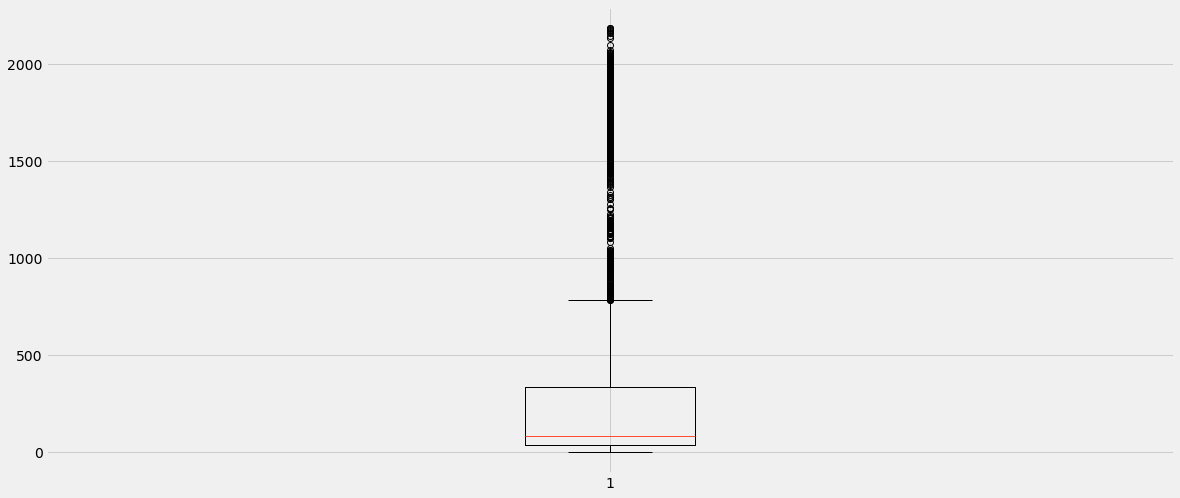

In [263]:
plt.boxplot(df_arima['High'])

In [197]:
# from statsmodels.tsa.stattools import adfuller
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
# #     rolmean = pd.rolling_mean(timeseries, window=12)
# #     rolstd = pd.rolling_std(timeseries, window=12)
    
#     ts_log = np.log(df_arima)
#     plt.plot(ts_log)
#     rolmean = ts_log.rolling(12).mean()  # here is the error
#     rolstd = ts_log.rolling(12).std() 
#     #Plot rolling statistics:
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

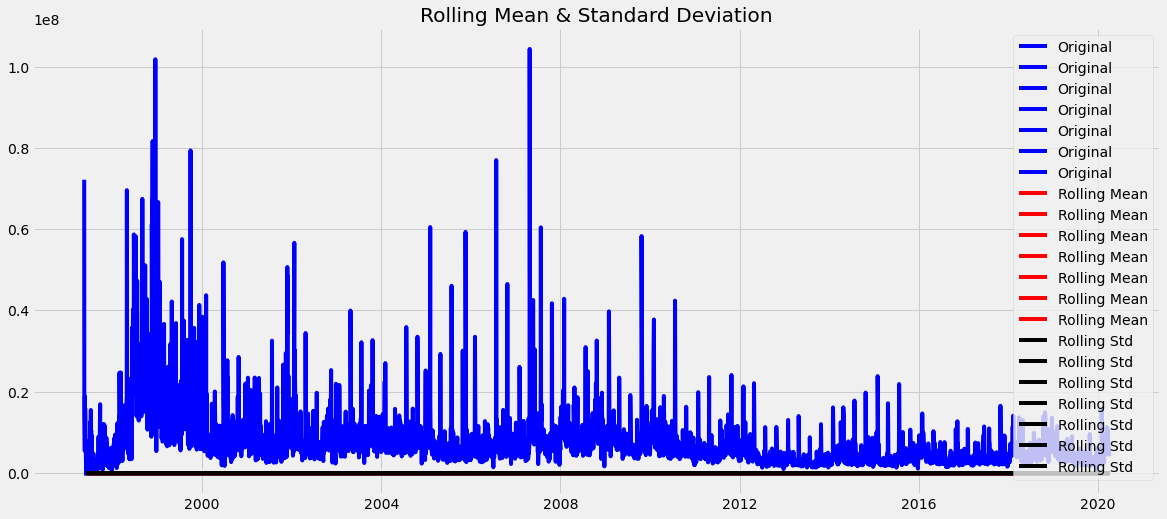

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

In [198]:
test_stationarity(df_arima)

# moving_avg = ts_log.rolling(12).mean()
# ts_log = np.log(ts)
# plt.plot(ts_log)
# moving_avg = pd.rolling_mean(ts_log,12)  # here is the error

# pd.rolling_mean  
# plt.plot(ts_log)
# plt.plot(moving_avg, color='red') 

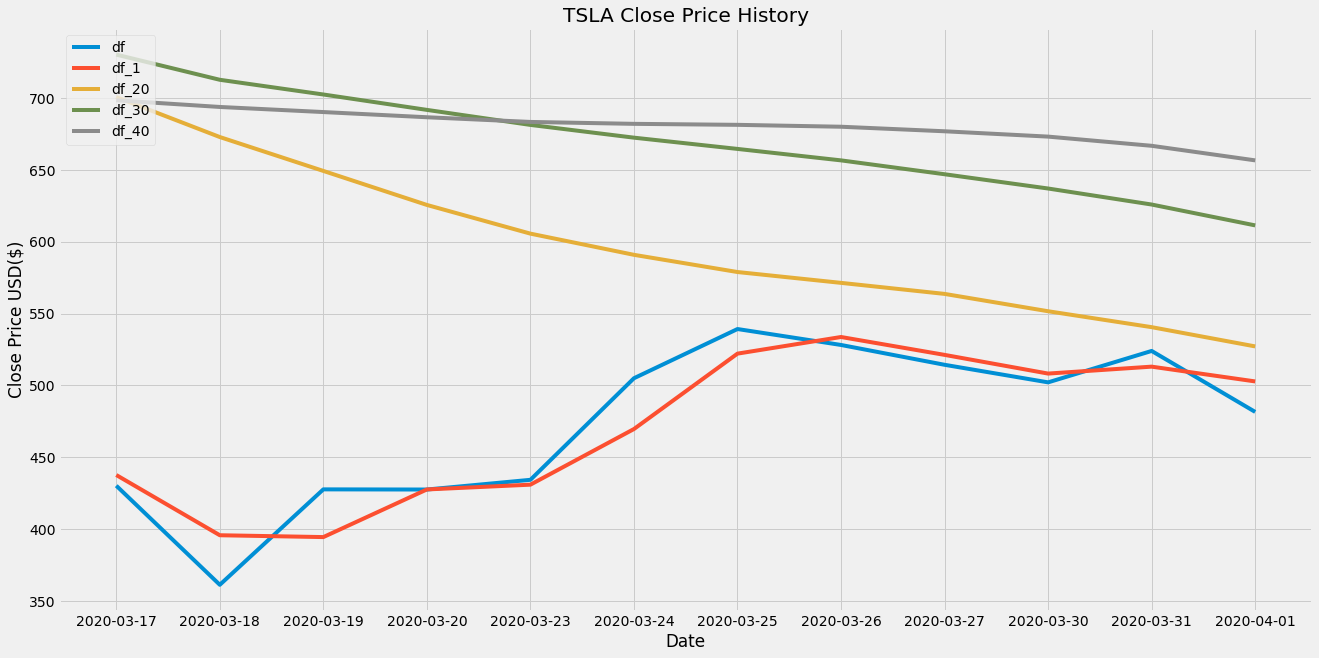

In [54]:
df_1 = pd.DataFrame()
df_1['Close'] = df['Close'].rolling(window=2).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()

plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(12), label='df')
plt.plot(df_1['Close'].tail(12), label='df_1')
plt.plot(df_20['Close'].tail(12), label='df_20')
plt.plot(df_30['Close'].tail(12), label='df_30')
plt.plot(df_40['Close'].tail(12), label='df_40')
s= name+" Close Price History"
plt.title(s)
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()


In [84]:

# series = df20['Close']

# # Create train data set
# train_split_date = '2015-12-31'
# train_split_index = np.where(df20.Date == train_split_date)[0][0]
# x_train = df20.loc[df_20['Date'] <= train_split_date]['Close']

# # Create test data set
# test_split_date = '2018-12-02'
# test_split_index = np.where(df20.Date == test_split_date)[0][0]
# x_test = df20.loc[df_20['Date'] >= test_split_date]['Close']

# # Create valid data set
# valid_split_index = (train_split_index.max(),test_split_index.min())
# x_valid = df20.loc[(df20['Date'] < test_split_date) & (df20['Date'] > train_split_date)]['Close']

In [85]:
# # Choose a window size for the moving average
# window = 20

# # Create a moving average over the entire dataset
# moving_avg = df_20['Close'].rolling(window=window).mean()

# # Slice the moving average on the forecast
# moving_avg_forecast = moving_avg.values[test_split_index - window:df_20.index.max() - window + 1]
                                         
# plt.figure(figsize=(10, 6))
# plot_series(x_test.index, x_test, label="Series")
# plot_series(x_test.index, moving_avg_forecast, label="Moving average (20 days)")
# plt.ylabel('Dollars $')
# plt.xlabel('Timestep in Days')
# plt.title('SMA20 vs Actual')

In [39]:
column = ['High', 'Low', 'Open', 'Volume', 'Adj Close']

In [40]:
df_arima.index = pd.to_datetime(df_arima.index)

Mean_Monthly = df_arima.Close.resample('M').mean()


In [41]:
Mean_Monthly['2017':]

Date
2017-01-31    239.320499
2017-02-28    263.711058
2017-03-31    258.156522
2017-04-30    304.758424
2017-05-31    316.524091
2017-06-30    365.803635
2017-07-31    328.804999
2017-08-31    350.875215
2017-09-30    357.857001
2017-10-31    344.683182
2017-11-30    310.191902
2017-12-31    322.841005
2018-01-31    338.583335
2018-02-28    335.777369
2018-03-31    315.983334
2018-04-30    289.772854
2018-05-31    289.852276
2018-06-30    335.600477
2018-07-31    311.974762
2018-08-31    331.214350
2018-09-30    290.147891
2018-10-31    284.993043
2018-11-30    344.495239
2018-12-31    344.109475
2019-01-31    318.494284
2019-02-28    307.728421
2019-03-31    277.757140
2019-04-30    266.655716
2019-05-31    219.715454
2019-06-30    213.716500
2019-07-31    242.382273
2019-08-31    225.102727
2019-09-30    237.261498
2019-10-31    266.354784
2019-11-30    338.300000
2019-12-31    377.694763
2020-01-31    528.659050
2020-02-29    797.446842
2020-03-31    559.101361
2020-04-30    481.55

<Figure size 1296x576 with 0 Axes>

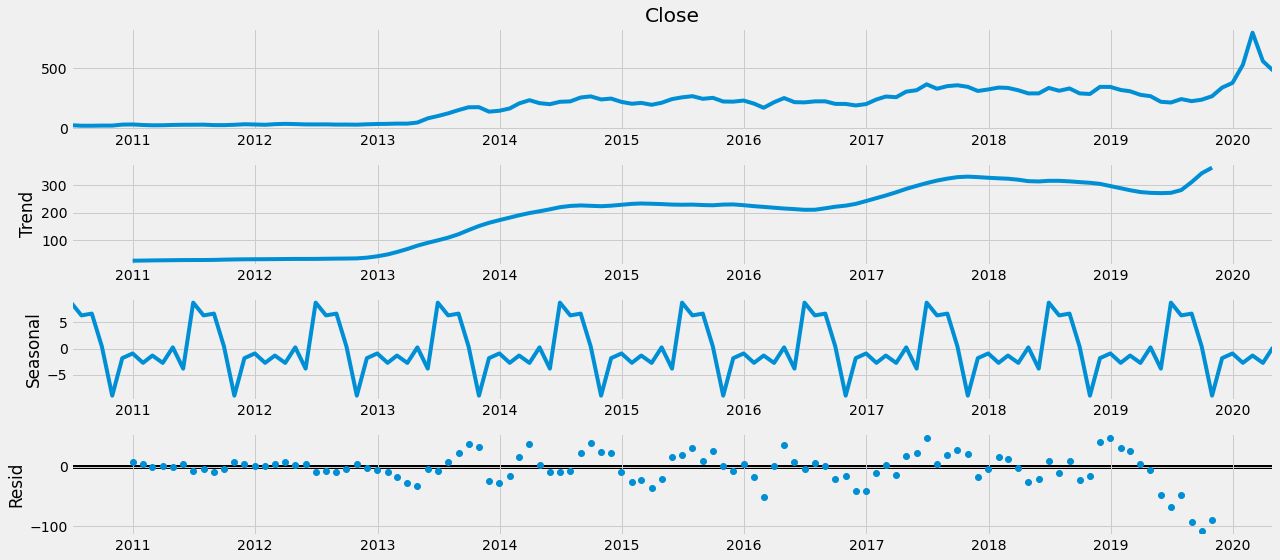

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomp = sm.tsa.seasonal_decompose(Mean_Monthly, model='additive')
fig = plt.figure() 
fig = decomp.plot()
# fig = decomposition.plot() 

plt.show()

# import statsmodels.api as sm 
# from statsmodels.tsa.stattools import acf 
# from statsmodels.tsa.stattools import pacf
# from statsmodels.tsa.seasonal import seasonal_decompose

# Important modules to import for this required step.

# decomposition = seasonal_decompose(new_air.Freight_Income, freq=6) 
# fig = plt.figure() 
# fig = decomposition.plot() 
# fig.set_size_inches(16, 8)

## Time series forecasting

In [50]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq_Seasonal = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# p: autoregression order.
# d: difference order.
# q: moving average order.
# m: The number of time steps for a single seasonal period.

print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_Seasonal[1]))
print('SARIMAX: {} x {}'.format(pdq[1], pdq_Seasonal[2]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_Seasonal[3]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_Seasonal[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
l_Parameter = []
l_Parammeter_Seasonal=[]
AIC_l_results=[]
for param in pdq:
    for param_seasonal in pdq_Seasonal:
        try:
            model = sm.tsa.statespace.SARIMAX(Mean_Monthly,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_Parameter.append(param)
            l_Parammeter_Seasonal.append(param_seasonal)
            AIC_l_results.append(results.aic)
        except Exception as e:
            print(e)
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1629.8294449637551
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1401.7594094408296
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1266.517451420412
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1136.5574218256188
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1271.9150442365305
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1260.1280708880984
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1147.6004984357278
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1138.553180085998
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1480.8345341966647
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1272.269274286135
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1164.4985711055322
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1044.5311384192642
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1182.8819607871642
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1161.2374525710386
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1064.8554915329548
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1046.531110529665
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1212.5246442273435
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1101.6355910370

In [56]:
minim=AIC_l_results[0]
for i in AIC_l_results[1:]:
    if i < minim: 
        minim = i
i=AIC_l_results.index(minim)
print(minim)
print(i)
# ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:982.5182608620529

982.5182608620529
59


In [57]:
model = sm.tsa.statespace.SARIMAX(Mean_Monthly,
                                order=l_Parameter[i],
                                seasonal_order=l_Parammeter_Seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

res = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7091      0.177     -4.003      0.000      -1.056      -0.362
ma.L1          0.8694      0.160      5.419      0.000       0.555       1.184
ar.S.L12      -0.3264      0.445     -0.734      0.463      -1.199       0.546
ma.S.L12      -0.2993      0.394     -0.759      0.448      -1.073       0.474
sigma2      2312.8390    191.986     12.047      0.000    1936.554    2689.124


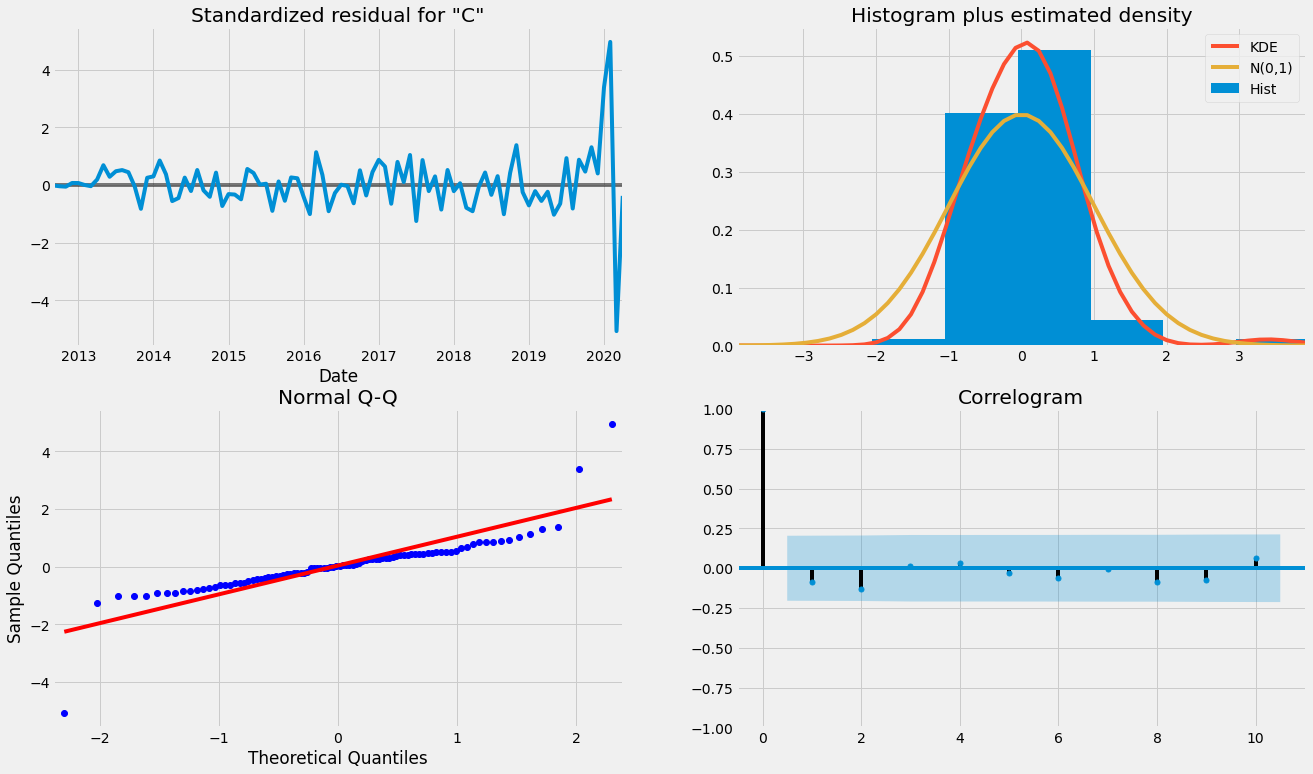

In [58]:
res.plot_diagnostics(figsize=(20, 12))
plt.show()

## Validating Predictions

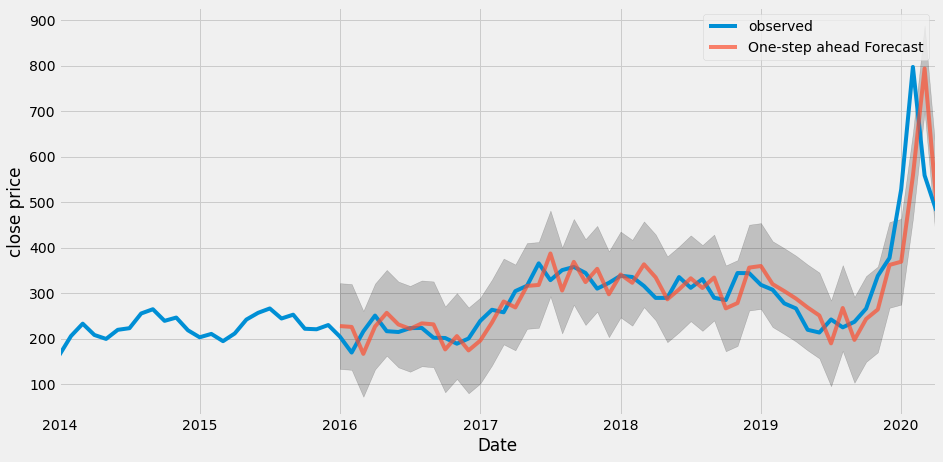

In [59]:
prediction = results.get_prediction(start=pd.to_datetime('2016-01-31'), dynamic=False)
pred_ci = prediction.conf_int()

axes = Mean_Monthly['2014':].plot(label='observed')
prediction.predicted_mean.plot(ax=axes, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

axes.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

axes.set_xlabel('Date')
axes.set_ylabel('close price')
plt.legend()

plt.show()

In [60]:
y_forecast = prediction.predicted_mean
y_true = Mean_Monthly['2016-01-31':]

# Compute the mean square error
mse = ((y_forecast - y_true) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3787.77


In [61]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 61.54


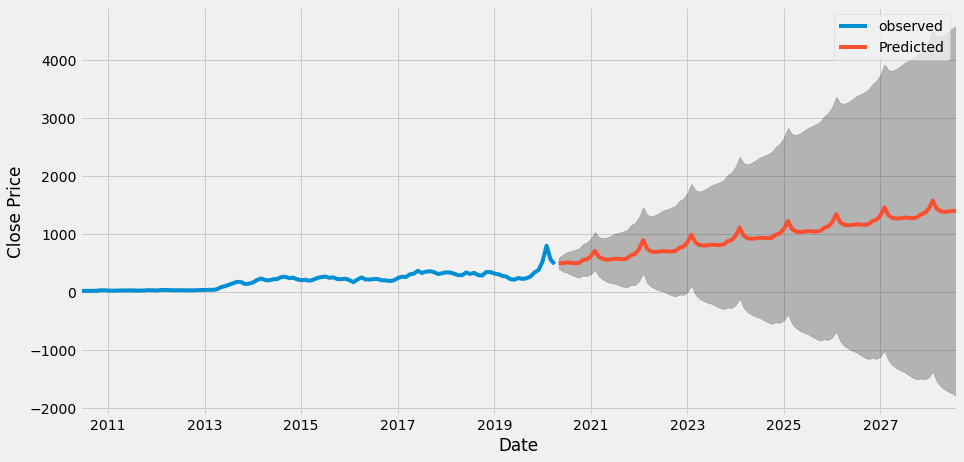

In [62]:
prediction_uc = results.get_forecast(steps=100)
prediction_ci = prediction_uc.conf_int()

axes = Mean_Monthly.plot(label='observed', figsize=(14, 7))
prediction_uc.predicted_mean.plot(ax=axes, label='Predicted')
axes.fill_between(prediction_ci.index,
                prediction_ci.iloc[:, 0],
                prediction_ci.iloc[:, 1], color='k', alpha=.25)
axes.set_xlabel('Date')
axes.set_ylabel('Close Price')

plt.legend()
plt.show()

# 3. LSTM

In [360]:
df_lstm = df
# Target column
target_adj_close = pd.DataFrame(df_lstm['Adj Close'])
display(df_lstm.head())
print(df_lstm.shape)

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,0.385558
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,0.373178
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,0.369641
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,0.360798
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,0.369641


(9909, 7)


In [361]:
feature_columns = ['Open', 'High', 'Low', 'Volume']

### Normalizing Data

In [362]:
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(df_lstm[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=df_lstm.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1980-12-12,0.000970,0.000967,0.000981,0.063023
1980-12-15,0.000894,0.000886,0.000898,0.023516
1980-12-16,0.000784,0.000777,0.000787,0.014061
1980-12-17,0.000812,0.000811,0.000822,0.011462
1980-12-18,0.000853,0.000852,0.000863,0.009711


In [363]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value

splitRow1 = round(0.2 * df_lstm.shape[0])

target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-splitRow1:-1]
target_adj_close = target_adj_close[:-splitRow1]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-splitRow1:-1]
feature_minmax_transform = feature_minmax_transform[:-splitRow1]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

# splitRow = round(0.8 * df.shape[0])
# ## Training (60%)
# train = df_lstm[:int(splitRow), :]
# X_train = train[:, :-1] # all data until day 30
# y_train = train[:, -1][:,-1] # day 31 close price
# print('Training set:', train.shape[0], 'obs')

# ## Test (40%)
# test = df[int(splitRow):, :]
# X_test = test[:, :-1] # all data until day 30
# y_test = test[:, -1][:,-1] # day 31 close price
# print('Test set:', test.shape[0], 'obs')

,Open,High,Low,Volume
Date,,,,
1980-12-12,0.000970,0.000967,0.000981,0.063023
1980-12-15,0.000894,0.000886,0.000898,0.023516
1980-12-16,0.000784,0.000777,0.000787,0.014061
1980-12-17,0.000812,0.000811,0.000822,0.011462
1980-12-18,0.000853,0.000852,0.000863,0.009711


Shape of features :  (9909, 4)
Shape of target :  (9909, 1)


,Open,High,Low,Volume
Date,,,,
2020-03-25,0.772017,0.787579,0.755379,0.040728
2020-03-26,0.758983,0.788891,0.761754,0.033786
2020-03-27,0.778179,0.780315,0.763889,0.027334
2020-03-30,0.771986,0.779247,0.771161,0.022450
2020-03-31,0.786961,0.800520,0.779207,0.026362


,Adj Close
Date,
2020-03-25,258.440002
2020-03-26,247.740005
2020-03-27,254.809998
2020-03-30,254.289993
2020-03-31,240.910004



 -----After process------ 

Shape of features :  (7927, 4)
Shape of target :  (7927, 1)


,Adj Close
Date,
2012-05-09,70.747803
2012-05-10,70.275345
2012-05-11,69.222549
2012-05-14,68.596275
2012-05-15,67.717102


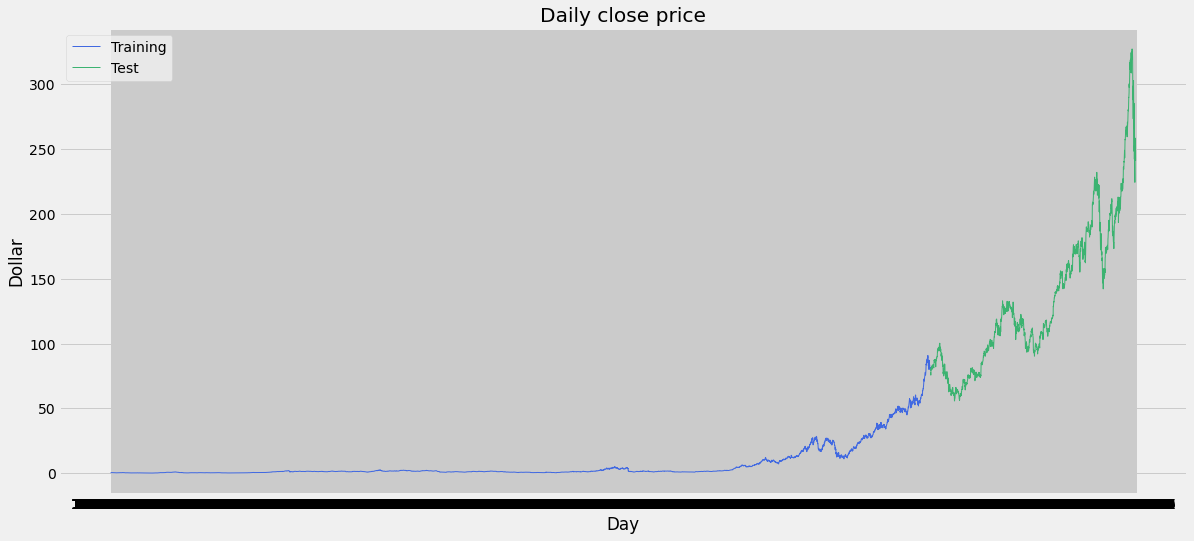

In [364]:
splitRow = round(0.8 * df_lstm.shape[0])
rawtrain = df_lstm.iloc[:splitRow]
rawtest = df_lstm.iloc[splitRow:]
plt.plot(rawtrain.index, rawtrain['Close'], color='royalblue', label='Training',linewidth=1)
plt.plot(rawtest.index, rawtest['Close'], color='mediumseagreen', label='Test',linewidth=1)
# plt.xticks([220, 473, 724, 976], ('2014', '2015', '2016', '2017'))
plt.legend(loc='upper left')
plt.title('Daily close price')
plt.xlabel('Day')
plt.ylabel('Dollar')
plt.show()

### Using TimeSeriesSplit for Train test Split

In [365]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [366]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7207, 4)
(720, 4)
(7207,)
(720,)


In [367]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

### Training the Model

In [368]:
from keras import regularizers

In [379]:
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
# model_lstm.add(Dense(1))
model_lstm.add(Dense(1, kernel_regularizer=regularizers.l2(0.05)))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=16, verbose=1, shuffle=False, callbacks=[early_stop])

Train on 7207 samples
Epoch 1/200
7207/7207 [==============================] - 3s 375us/sample - loss: 20.6695
Epoch 2/200
7207/7207 [==============================] - 1s 202us/sample - loss: 19.4050
Epoch 3/200
7207/7207 [==============================] - 1s 184us/sample - loss: 19.1217
Epoch 4/200
7207/7207 [==============================] - 1s 151us/sample - loss: 18.8150
Epoch 5/200
7207/7207 [==============================] - 1s 129us/sample - loss: 18.4046
Epoch 6/200
7207/7207 [==============================] - 1s 133us/sample - loss: 17.9218
Epoch 7/200
7207/7207 [==============================] - 1s 143us/sample - loss: 17.3812
Epoch 8/200
7207/7207 [==============================] - 1s 142us/sample - loss: 16.8281
Epoch 9/200
7207/7207 [==============================] - 1s 142us/sample - loss: 16.1924
Epoch 10/200
7207/7207 [==============================] - 1s 130us/sample - loss: 15.5327
Epoch 11/200
7207/7207 [==============================] - 1s 132us/sample - loss: 14.84

### Predictions made by LSTM

In [380]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.6f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.6f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)



The R2 score on the Train set is:	0.983367
The R2 score on the Test set is:	0.876664


In [382]:
plt.figure(figsize=(7, 5))
plt.plot(history_model_lstm.history['mean_squared_error'])
plt.plot(history_model_lstm.history['val_mean_squared_error'])
plt.title('model (Mean Squared Error)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


KeyError: 'mean_squared_error'

<Figure size 504x360 with 0 Axes>

In [371]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=32)

720/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [372]:
print('LSTM: %f'%score_lstm)

LSTM: 23.976683


In [373]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

### Visual from LSTM's Prediction

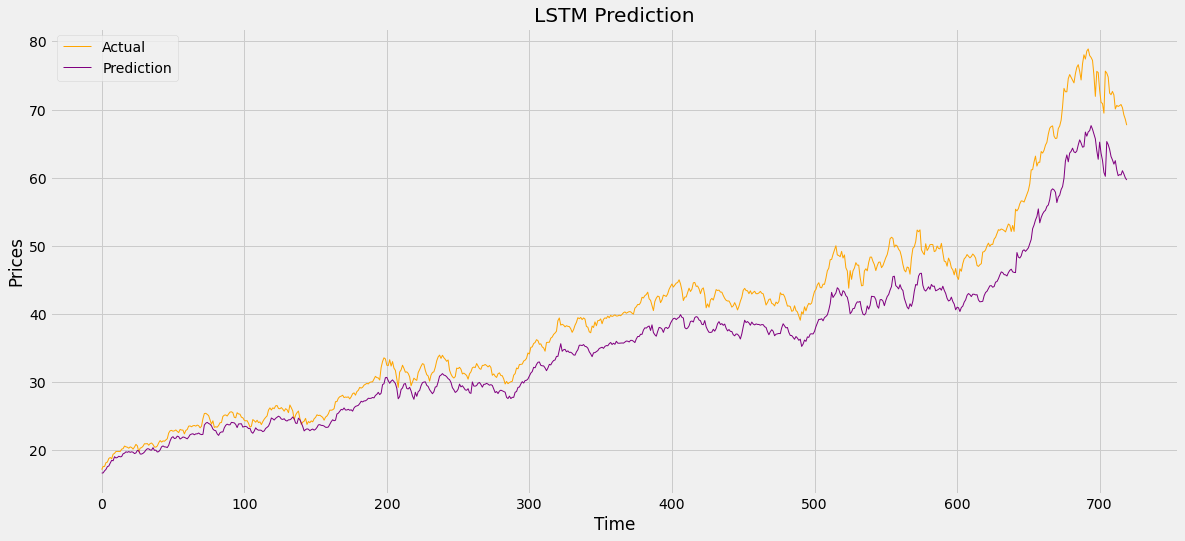

In [374]:
plt.plot(y_test, label='Actual',linewidth=1,color='orange')
plt.plot(y_pred_test_LSTM, label='Prediction',linewidth=1,color='purple')
plt.title("LSTM Prediction")
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.show()

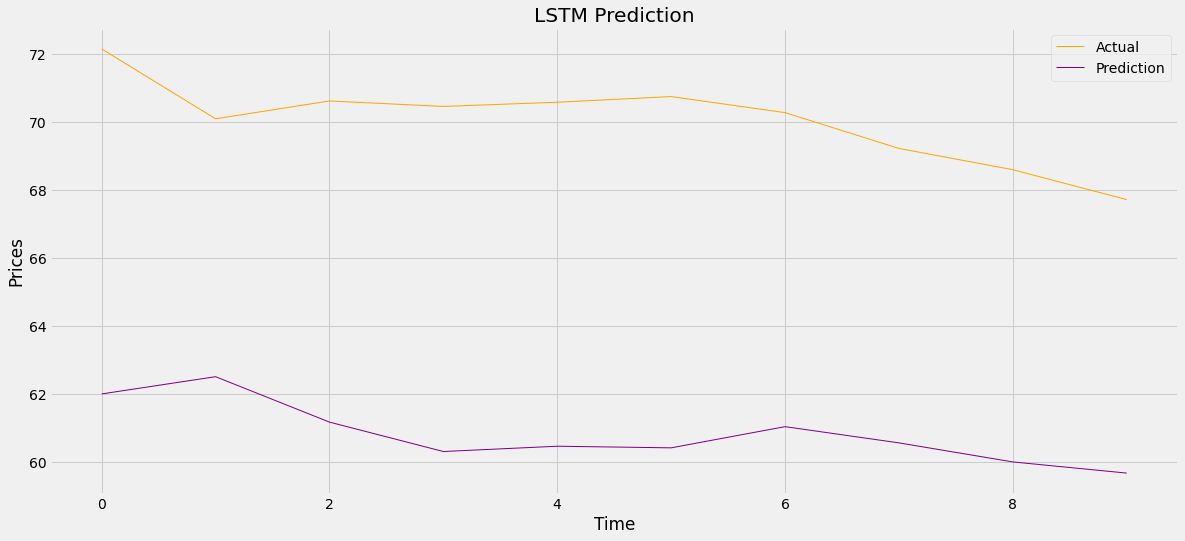

In [375]:
# plt.plot(x_test.index[-50:], model_predictions[-50:], color='blue',label='Predicted Price')
# plt.plot(x_test.index[-50:], x_test[-50:], color='red', label='Actual Price')
# plt.ylabel('Dollars $')
# plt.xlabel('Timestep in Days')
# plt.title('ARIMA(4,2,0) Forecast vs Actual')
# #plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
# plt.legend()
# plt.figure(figsize=(10,6))
# plt.show()

plt.plot(y_test[-10:], label='Actual',linewidth=1,color='orange')
plt.plot(y_pred_test_LSTM[-10:], label='Prediction',linewidth=1,color='purple')
plt.title("LSTM Prediction")
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [377]:
mse = mean_squared_error(y_test,y_pred_test_LSTM)

rmse = math.sqrt(mse)

print(rmse)

4.878566947588724


In [114]:
# def plot_graph(code):
#     global closing_stock
#     global opening_stock
#     f, axs = plt.subplots(2,2,figsize=(8,8))
#     plt.subplot(212)
#     company = data.copy()
#     company = company.Open.values.astype('float32')
#     company = company.reshape(-1, 1)
#     opening_stock = company
#     plt.grid(True)
#     plt.xlabel('Time')
#     plt.ylabel(code + " open stock prices")
#     plt.title('prices Vs Time')
#     plt.plot(company , 'g')
    
#     plt.subplot(211)
#     company_close = data.copy()
#     company_close = company_close.Close.values.astype('float32')
#     company_close = company_close.reshape(-1, 1)
#     closing_stock = company_close
#     plt.xlabel('Time')
#     plt.ylabel(code + " close stock prices")
#     plt.title('prices Vs Time')
#     plt.grid(True)
#     plt.plot(company_close , 'b')
#     plt.show()

In [115]:
# plt.figure(figsize=(15, 5));
# plt.subplot(1,2,1);
# plt.plot(data['Open'].Open.values, color='red', label='open')
# plt.plot(data['Close'].Close.values, color='green', label='close')
# plt.plot(data['Low'].Low.values, color='blue', label='low')
# plt.plot(data['High'].High.values, color='black', label='high')
# plt.title('stock price')
# plt.xlabel('time [days]')
# plt.ylabel('price')
# plt.legend(loc='best')
# #plt.show()

# plt.subplot(1,2,2);
# plt.plot(data['Volume'].Volume.values, color='black', label='volume')
# plt.title('stock volume')
# plt.xlabel('time [days]')
# plt.ylabel('volume')
# plt.legend(loc='best')



In [104]:
dfreg = df_lr.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df_lr['High'] - df_lr['Low']) / df_lr['Close'] * 100.0
dfreg['PCT_change'] = (df_lr['Close'] - df_lr['Open']) / df_lr['Open'] * 100.0
dfreg.tail()
#df->df_lr

,Adj Close,Volume,HL_PCT,PCT_change
2452,528.159973,17380700,9.040821,-3.513042
2453,514.359985,14377400,6.176606,1.853462
2454,502.130005,11998100,5.062437,-1.593306
2455,524.000000,17771500,8.770997,4.538653
2456,481.559998,13304500,8.067532,-4.452381


In [105]:

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]
y_lately = y[-forecast_out:]

In [107]:
X_train = X
y_train = y

# 1. Linear regression 
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [108]:
X_test = X_lately
y_test = y_lately

confidence_reg = clfreg.score(X_test, y_test)

print("confidencereg : ",confidence_reg)


confidencereg :  0.9452278019937096


In [109]:
dfreg_lr = dfreg.copy()

In [110]:
dfreg_lr.head()

,Adj Close,Volume,HL_PCT,PCT_change,label
0,23.889999,18766300,31.226452,25.736839,21.260000
1,23.830000,17187100,29.878308,-7.599848,20.450001
2,21.959999,8218800,25.728597,-12.160004,19.590000
3,19.200001,5139800,22.864589,-16.521736,19.600000
4,16.110001,6866900,25.884543,-19.449997,19.030001


In [111]:
forecast_set_linear_regression = clfreg.predict(X_lately)
dfreg_lr['Forecast_linear_regression'] =  np.nan
print(forecast_set_linear_regression)



[653.48071053 637.99570243 711.17771139 709.86035144 712.51770648
 686.66093101 674.31705885 575.44970535 606.38712878 602.01688024
 541.29149046 497.08216197 429.52052428 402.23863775 350.30658904
 397.44785346 431.90906829 427.3632907  503.41686928 528.0206719
 506.9700102  497.98616344 485.83114456 504.64679739 459.25624133]


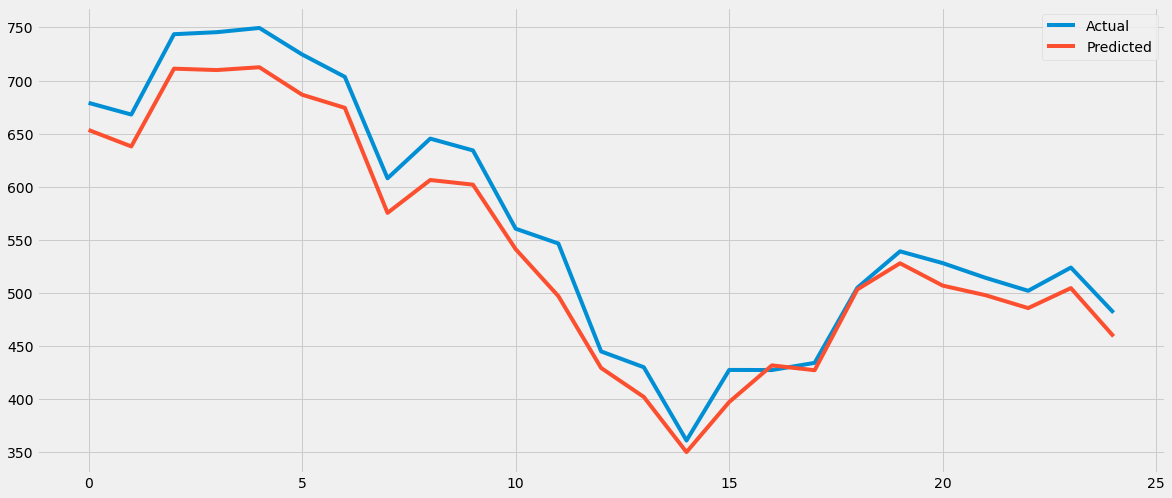

In [116]:
df2 = pd.DataFrame({'Actual': y_lately, 'Predicted' : forecast_set_linear_regression})
df2.plot()


In [86]:
x = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values

In [87]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)


In [88]:
regressor = LinearRegression()

In [89]:

regressor.fit(x_train, y_train)

LinearRegression()

In [90]:

LinearRegression()



LinearRegression()

In [91]:
print(regressor.coef_)


[ 7.91887608e-01  7.73134696e-01 -5.64291729e-01 -2.31147672e-08]


In [92]:

print(regressor.intercept_)


0.07492028968869135


In [93]:

predicted = regressor.predict(x_test)


In [94]:

print(predicted)

[356.83012211 237.26497722 260.30901475  34.08796443  29.88887158
 246.90703089 234.55206897 241.61025199 204.70131571  27.30892289
 347.46287208 223.29021734 232.44802918 307.81486843 247.30451706
 301.35747599 202.13551233 365.6617035   32.2518782   27.79224758
 192.98977153 229.96336349 248.71562316 226.3749342  191.64489027
 120.02290077  33.51661613 365.69681068 165.21816837 254.96705571
 224.8749436  224.29297813 195.59444197 286.69027166 294.7778419
  34.79216226 230.26310909  16.70683326  16.70058316 347.56042094
  31.09032682 120.70474239 178.38512993  24.47877586 305.47926746
 312.54797376  30.83751381 274.86978671 233.97927224 118.56024279
  25.00164142 250.14798626 267.9592421  344.95378419 286.55126004
 346.8745845   29.29470858 319.36730815  53.91344847  46.83737096
 227.87278503 226.75759951 332.90360789  31.16852484  21.45778314
 240.49547293 377.12477738 334.51815245 229.7424855  199.61195603
 345.46713251 298.90184691  27.43350837 267.84755825  34.50564729
 344.697764

In [95]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [96]:
import math
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.6326772706748707
Mean Squared Error: 9.439797740154418
Root Mean Squared Error: 3.0724253839848443


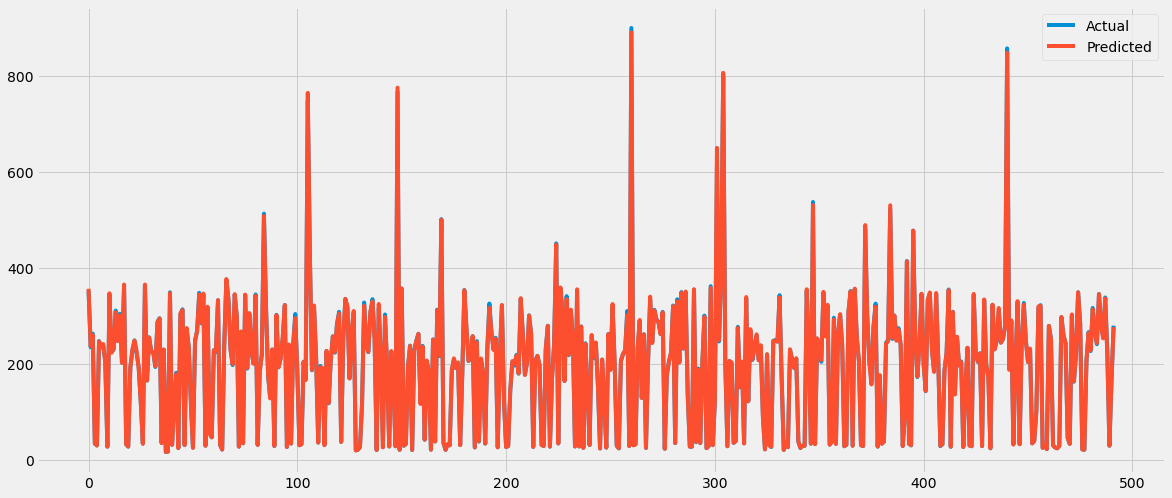

In [97]:
graph = df2
graph.plot()